# Calling the SHARE API
----
Here are some working examples of how to query the current scrAPI database for metrics of results coming through the SHARE Notifiation Service.

## Setup

- All of the examples I use here will be using python and some basic libraries
- Code and setup instructions on github at:
     - https://github.com/erinspace/share_tutorials

- To run these examples on your machine, you'll need to install some basic python packages
    - Make sure to use a virtual enviornment to install python packages:
        - https://virtualenv.readthedocs.org/en/latest/
    - Using your terminal, run ```pip install -r requirements.txt``` inside your virtual enviornment
- Run the Jupyter notebook server from the command line:
    ```jupyter notebook```

### Get a List of the Current SHARE Providers
----
We'll make an API call to find:
- The official name of each SHARE Provider
- The URL for the home page of each SHARE Provider
- The shortname, or nickname of the SHARE provider for internal use
    - We'll use this name when querying for documents from this source

In [1]:
import requests

data = requests.get('https://osf.io/api/v1/share/providers/').json()

In [2]:
data

{u'providerMap': {u'addis_ababa': {u'favicon': u'data:image/png;base64,AAABAAEAEBAAAAEAIABoBAAAFgAAACgAAAAQAAAAIAAAAAEAIAAAAAAAAAQAABILAAASCwAAAAAA%0AAAAAAAD19vL/9ffy//X28f/09fH/9fv5//z/9v/%2B%2Bur/%2BPHg//r04//9/e7/%2Bv73//X49v/09fH/%0A9fby//X28v/19vL/9PXx//T08P/z9vP/%2Bfz0/%2B7h0P/BqK7/moKl/4lumv%2BOdKD/q5Kp/9S%2Buf/1%0A8OD/9vr2//P18P/09vD/9PXx//X18f/09/X/%2Bfns/8ivrf9rU5v/TU25/0hPw/9TWcf/Gh23/z5D%0AwP9bUa7/kHSd/%2BTVxv/3%2B/X/9PXz//X28v/09vT/%2Bvvx/7yfpP9GO6b/HiW9/3BLmv%2BIQmv/lzRL%0A/4g0WP95PXn/Vkmv/0tRwf96YZ7/4M/C//j79//19fL/%2B//6/9bAuP9NPqH/VV3H/4ZBdP/AKhn/%0ApXZj/8FCJ/%2B2Xkf/sGFL/7IpLP9mTaL/TlfD/4lunv/y6df/9/v4//z14/%2BEapz/SlfL/4c2Z//b%0AVj7/7N3W/%2Bne3v/ev7v/5c3L/%2Bji4v/uu6r/uiMg/1hEp/9BP7L/xKuw//v%2B9f/k0cL/OjCl/zcl%0AqP%2BpQjv/nn1w/%2BrPy//9////8PLy//X8/P/8%2Bfj/zKai/5xmUP%2BKOWL/GiG7/4dwpP/89uP/z7Wz%0A/w4TsP9HCHn/oW5a/2qkpP/IUj//6aSZ/9uWjf/ipJv/5IZ4/6dRQ/9stK//n0VL/wIAqP9ZSaL/%0A9ebR/8Goqv8GDLH/WhNx/5Z%2Bav%2BGgHj/ygwA/51NPv%2BEgHj/iXJn/7cjEP/BIQ7/eJ2V/5pVU/8R%0AAKL/SDmf

#### This is a lot of information!

Let's narrow it down a bit and print out some things we're interested in.

In [3]:
for source in data['providerMap'].keys():
    print(
        '{}\n{}\n{}\n'.format(
            data['providerMap'][source]['long_name'].encode('utf-8'),
            data['providerMap'][source]['url'],
            data['providerMap'][source]['short_name']
        )
    )

Department of Energy Pages
http://www.osti.gov/pages/
doepages

ScholarSphere @ Penn State University
https://scholarsphere.psu.edu/
scholarsphere

ScholarsArchive@OSU
http://ir.library.oregonstate.edu/
scholarsarchiveosu

University of Texas at Austin Digital Repository
https://repositories.lib.utexas.edu
utaustin

ScholarWorks@UMass Amherst
http://scholarworks.umass.edu
scholarworks_umass

Apollo @ University of Cambridge
https://www.repository.cam.ac.uk
cambridge

DSpace at Texas State University
https://digital.library.txstate.edu/
texasstate

Open Science Framework
http://osf.io/api/v1/search/
osf

Lake Winnipeg Basin Information Network
http://130.179.67.140
lwbin

Research Online @ University of Wollongong
http://ro.uow.edu.au
uow

The OAKTrust Digital Repository at Texas A&M
http://oaktrust.library.tamu.edu
oaktrust

Deep Blue @ University of Michigan
http://deepblue.lib.umich.edu
umich

Cognitive Sciences ePrint Archive
http://www.cogprints.org/
cogprints

Trace: Tennessee Res

## SHARE Schema

Required fields:
- title
- contributors
- uris
- providerUpdatedDateTime

We add some information after each document is harvested inside the field shareProperties, including:
- source (where the document was originally harvested)
- docID  (a unique identifier for that object from that source)

These two fields can be combined to make a unique document identifier.

## Simple Queries

- We need a URL to use to access the SHARE API.
- We will add arguments to this URL to shape our request
    - size: how many results we'll return
    - sort: how we want the results to be sorted
    - from: where to start in the resutls returned

In [4]:
OSF_APP_URL = 'https://osf.io/api/v1/share/search/'

In [5]:
import furl

search_url = furl.furl(OSF_APP_URL)
search_url.args['size'] = 3
search_url.args['sort'] = 'providerUpdatedDateTime'
search_url.args['from'] = 5

### Our Query URL So far

In [6]:
print('The request URL is {}'.format(search_url.url))

The request URL is https://osf.io/api/v1/share/search/?size=3&sort=providerUpdatedDateTime&from=5


### Our results

In [7]:
recent_results = requests.get(search_url.url).json()

for result in recent_results['results']:
    print(
        '{} -- from {} -- updated at {}'.format(
            result['title'].encode('utf-8'),
            result['shareProperties']['source'],
            result['providerUpdatedDateTime']
        )
    )

HRH05-122 -- from tdar -- updated at 2016-02-21T18:50:11.946000+00:00
HRH05-120 -- from tdar -- updated at 2016-02-21T18:50:11.942000+00:00
HRH05-118 -- from tdar -- updated at 2016-02-21T18:50:11.935000+00:00


### Narrowing Results by Source

In [8]:
search_url.args['q'] = 'shareProperties.source:mit'
recent_results = requests.get(search_url.url).json()

print('The request URL is {}'.format(search_url.url))
print('---------')
for result in recent_results['results']:
    print(
        '{} -- from {} -- updated at {}'.format(
            result['title'].encode('utf-8'),
            result['shareProperties']['source'],
            result['providerUpdatedDateTime']
        )
    )

The request URL is https://osf.io/api/v1/share/search/?size=3&sort=providerUpdatedDateTime&from=5&q=shareProperties.source:mit
---------
Velocity statistics of the Nagel-Schreckenberg model -- from mit -- updated at 2016-02-19T14:03:04+00:00
Neutralizing antibodies against West Nile virus identified directly from human B cells by single-cell analysis and next generation sequencing -- from mit -- updated at 2016-02-19T07:19:02+00:00
Tumor cells are dislodged into the pulmonary vein during lobectomy -- from mit -- updated at 2016-02-19T07:19:01+00:00


## Complex Queries
- The SHARE Search API runs on elasticsearch
- More information on how to format elasticsearch queries: 
    - https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl.html).

### Defining a Helper Function
- We'll use this helper function in later examples.

In [9]:
import json

def query_share(url, query):
    # A helper function that will use the requests library,
    # pass along the correct headers,
    # and make the query we want
    headers = {'Content-Type': 'application/json'}
    data = json.dumps(query)
    return requests.post(url, headers=headers, data=data, verify=False).json()

### Building a Query

In [10]:
sponsorship_query = {
    "size": 5,
    "query": {
        "filtered": {
            "filter": {
                "exists": {
                    "field": "sponsorships"
                }
            }
        }
    }
}

### Running the Query and Printing Results

In [11]:
results = query_share(search_url.url, sponsorship_query)

for item in results['results']:
    print('{} -- from source {} -- sponsored by {}'.format(
            item['title'].encode('utf-8'),
            item['shareProperties']['source'].encode('utf-8'),
            ' '.join(
                [sponsor['sponsor']['sponsorName'] for sponsor in item['sponsorships']]
            )
        )
    )
    print('-------------------')

A Phase III, Randomized, Comparative, Open-label Study of Intravenous Iron Isomaltoside 1000 (Monofer®) Administered as Maintenance Therapy by Single or Repeated Bolus Injections in Comparison With Intravenous Iron Sucrose in Subjects With Stage 5 Chronic Kidney Disease on Dialysis Therapy (CKD-5D) -- from source clinicaltrials -- sponsored by Pharmacosmos A/S 
-------------------
Phase IB Study of FOLFIRINOX Plus PF-04136309 in Patients With Borderline Resectable and Locally Advanced Pancreatic Adenocarcinoma -- from source clinicaltrials -- sponsored by Washington University School of Medicine National Cancer Institute (NCI)
-------------------
Discontinuation of Infliximab Therapy in Patients With Crohn's Disease During Sustained Complete Remission: A National Multi-center, Double Blinded, Randomized, Placebo Controlled Study -- from source clinicaltrials -- sponsored by Copenhagen University Hospital at Herlev 
-------------------
Temperature Evaluation by MRI Thermometry During Ce

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


### New Query

How many results *do not* have tags?

In [12]:
tags_query = {
    "query": {
        "query_string": {
            "analyze_wildcard": True, 
            "query": "NOT tags:*"
        }
    }
}

In [13]:
results_with_tags = query_share(search_url.url, tags_query)
total_results = requests.get(search_url.url).json()['count']
results_percent = (float(results_with_tags['count'])/total_results)*100

print(
    '{} results out of {}, or {}%, do not have tags.'.format(
        results_with_tags['count'],
        total_results,
        format(results_percent, '.2f')
    )
)

4490853 results out of 55609, or 8075.77%, do not have tags.


/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


## Using sharepa for SHARE Parsing and Analysis

- sharepa - short for SHARE Parsing and Analysis
    - https://github.com/CenterForOpenScience/sharepa#sharepa

### Basic Actions

A basic search will provide access to all documents in SHARE in 10 document slices.

#### Count
You can use sharepa and the basic search to get the total number of documents in SHARE

In [14]:
from sharepa import basic_search

basic_search.count()

4697826

### Iterating Through Results

In [15]:
results = basic_search.execute()

for hit in results:
    print(hit.title)

Avian community structure and incidence of human West Nile infection
Rat12_a
Non compact continuum limit of two coupled Potts models

Simultaneous Localization, Mapping, and Manipulation for Unsupervised
  Object Discovery
Synthesis of High-Temperature Self-lubricating Wear Resistant Composite Coating on Ti6Al4V Alloy by Laser Deposition
Comparative Studies of Silicon Dissolution in Molten Aluminum Under Different Flow Conditions, Part I: Single-Phase Flow
Scrambling of data in all-optical domain
Step behaviour and autonomic nervous system activity in multiparous dairy cows during milking in a herringbone milking system
<p>Typical features of the constant velocity forced dissociation process in the SGP-3-ligated 1G1Q 2CR complex system.</p>


In [16]:
results = basic_search[20:25].execute()
for hit in results:
    print(hit.title)

Elements of Trust in Named-Data Networking
Effect of Perceived Attributions about Ostracism on Social Pain and Task Performance
Millimeter Wave MIMO Channel Tracking Systems
Metric Dimension and Zero Forcing Number of Two Families of Line Graphs
The Glassey conjecture on asymptotically flat manifolds


## Advanced Search with sharepa

Queries are formed using lucene query syntax 
    - https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-query-string-query.html#query-string-syntax

In [17]:
from sharepa import ShareSearch
from sharepa.helpers import pretty_print

my_search = ShareSearch()

my_search = my_search.query(
    'query_string',
    query='NOT tags:*',
    analyze_wildcard=True
)

pretty_print(my_search.to_dict())

{
    "query": {
        "query_string": {
            "analyze_wildcard": true, 
            "query": "NOT tags:*"
        }
    }
}


In [18]:
new_results = my_search.execute()
for hit in new_results:
    print(hit.title)

Avian community structure and incidence of human West Nile infection
Non compact continuum limit of two coupled Potts models

Simultaneous Localization, Mapping, and Manipulation for Unsupervised
  Object Discovery
Synthesis of High-Temperature Self-lubricating Wear Resistant Composite Coating on Ti6Al4V Alloy by Laser Deposition
Comparative Studies of Silicon Dissolution in Molten Aluminum Under Different Flow Conditions, Part I: Single-Phase Flow
Scrambling of data in all-optical domain
Step behaviour and autonomic nervous system activity in multiparous dairy cows during milking in a herringbone milking system
<p>Typical features of the constant velocity forced dissociation process in the SGP-3-ligated 1G1Q 2CR complex system.</p>
The elusive shepherdess


## Debugging and Problem Solving

Not everything always goes as planned when querying an unfamillar API. Here are some debugging and problem solving strategies when you're querying the SHARE API.

### Start forming a search we're not too sure about

We are interesting in seeing how many results are specified as being in a language other than English

In [19]:
language_search = ShareSearch()

language_search = language_search.query(
    'query_string',
    query='NOT languages=english'
)

In [20]:
results = language_search.execute()

for hit in results:
    print(hit.languages)

AttributeError: 'Result' object has no attribute 'languages'

### That didn't look right.

Let's look at our error:

```AttributeError: 'Result' object has no attribute 'languages' ```

### Building up the correct query

Let's ry narrowing our query to only results that have a language attribute

(Language is not required, so many results won't have this information.

In [21]:
language_search = ShareSearch()

language_search = language_search.filter(
    'exists',
    field="languages"
)

In [22]:
results = language_search.execute()

print('There are {}/{} documents with languages specified'.format(
        language_search.count(),
        basic_search.count()
    )
)

There are 206084/4697826 documents with languages specified


In [23]:
print('Here are the languages for the first 10 results:')

for hit in results:
    print(hit.languages)

Here are the languages for the first 10 results:
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']
[u'eng']


### Referencing the SHARE Schema

Simplified form here: https://github.com/CenterForOpenScience/SHARE-Schema/blob/master/share.yaml

#### Section on languages:
        languages:
            description: |-
                The primary languages in which the content of the resource is presented. Values used for this element MUST conform to ISO 639-3. This offers three letter tags e.g. "eng" for English.
            type: array
            items:
                type: string
                pattern: "[a-z][a-z][a-z]"

### Continuing to Refine our Query

In [24]:
from elasticsearch_dsl import Q

language_search = language_search.query(~Q("term", languages="eng"))

results = language_search.execute()

In [25]:
print(
    'There are {} documents that do not have "eng" listed.'.format(
        language_search.count()
    )
)

print('Here are the languages for the first 10 results:')

for hit in results:
    print(hit.languages)

There are 17559 documents that do not have "eng" listed.
Here are the languages for the first 10 results:
[u'ger']
[u'ger']
[u'fre']
[u'ita']
[u'fre']
[u'fre']
[u'fre']
[u'fre', u'lat']
[u'ger']
[u'ger']


# Complex Queries and Basic Visualization

- How to use both basic HTTP requests and sharepa
- Aggregations, or queries that will return summary statistics about the whole dataset.
- simple data visualizations using pandas and matplotlib

## Aggregations

Aggregations let you quickly get summary statistics for all of SHARE results in one query.

### Documents Per Source Missing Titles

In [26]:
missing_titles_aggregation = {
    "query": {
        "query_string": {
            "analyze_wildcard": True, 
            "query": "NOT title:*"
        }
    }, 
    "aggs": {
        "sources": {
            "terms": {
                "field": "_type", # A field where the SHARE source is stored                
                "min_doc_count": 0, 
                "size": 0  # Will return all sources, regardless if there are results
            }
        }
    }
}

In [27]:
results_without_titles = query_share(OSF_APP_URL, missing_titles_aggregation)

missing_titles_counts = results_without_titles['aggregations']['sources']['buckets']

for source in missing_titles_counts:
    print('{} has {} documents without titles'.format(source['key'], source['doc_count'], ))

dataone has 264982 documents without titles
biomedcentral has 22891 documents without titles
citeseerx has 10408 documents without titles
crossref has 5295 documents without titles
smithsonian has 101 documents without titles
pubmedcentral has 55 documents without titles
datacite has 54 documents without titles
bhl has 7 documents without titles
figshare has 5 documents without titles
scitech has 3 documents without titles
caltech has 2 documents without titles
iowaresearch has 2 documents without titles
rcaap has 2 documents without titles
dash has 1 documents without titles
duke has 1 documents without titles
ghent has 1 documents without titles
icpsr has 1 documents without titles
lshtm has 1 documents without titles
mit has 1 documents without titles
scholarsphere has 1 documents without titles
shareok has 1 documents without titles
ucescholarship has 1 documents without titles
uiucideals has 1 documents without titles
uwashington has 1 documents without titles
addis_ababa has 0 do

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


### Making Results More Useful

Let's do that same query, but this time find the percentages of documents from each source insead of the numbers alone.

We'll also leave out sources that have all of their titles to make the list more managable.

In [28]:
sig_terms_agg = {
    "query": {
        "query_string": {
            "analyze_wildcard": True, 
            "query": "NOT title:*"
        }
    },
    "aggs": {
        "sources":{
            "significant_terms":{
                "field": "_type", # A field where the SHARE source is stored                
                "min_doc_count": 1, # Only results with more than one document
                "percentage": {} # This will make the "score" parameter a percentage
            }
        }
    }
}

In [29]:
docs_with_no_title_results = query_share(OSF_APP_URL, sig_terms_agg)
docs_with_no_title = docs_with_no_title_results['aggregations']['sources']['buckets']

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:768: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [30]:
for source in docs_with_no_title:
    print(
        '{}% (or {}/{}) of documents from {} have no titles'.format(
            format(source['score']*100, '.2f'),
            source['doc_count'],
            source['bg_count'],
            source['key']
        )
    )

94.31% (or 22891/24271) of documents from biomedcentral have no titles
75.55% (or 264982/350751) of documents from dataone have no titles
5.19% (or 10408/200444) of documents from citeseerx have no titles
1.38% (or 101/7323) of documents from smithsonian have no titles
0.72% (or 1/138) of documents from scholarsphere have no titles
0.54% (or 5295/987178) of documents from crossref have no titles
0.28% (or 1/356) of documents from duke have no titles
0.10% (or 1/1036) of documents from dash have no titles
0.07% (or 1/1523) of documents from ghent have no titles
0.03% (or 2/5754) of documents from caltech have no titles


### Aggregations with sharepa

Let's use sharepa to find out how many documents per source that do not have tags

In [31]:
no_tags_search = ShareSearch()

no_tags_search = no_tags_search.query(
    'query_string', # Type of query, will accept a lucene query string
    query='NOT tags:*', # This lucene query string will find all documents that don't have tags
    analyze_wildcard=True  # This will make elasticsearch pay attention to the asterisk (which matches anything)
)

no_tags_search.aggs.bucket(
    'sources',  # Every aggregation needs a name
    'significant_terms',  # There are many kinds of aggregations
    field='_type',  # We store the source of a document in its type, so this will aggregate by source
    min_doc_count=1,
    percentage={},
    size=0
)

SignificantTerms(field='_type', min_doc_count=1, percentage={}, size=0)

#### Examiming the query

Let's take a look at the query that sharepa generated, and we'll see that it looks a lot like the query we made by hand

In [32]:
pretty_print(no_tags_search.to_dict())

{
    "query": {
        "query_string": {
            "analyze_wildcard": true, 
            "query": "NOT tags:*"
        }
    }, 
    "aggs": {
        "sources": {
            "significant_terms": {
                "field": "_type", 
                "percentage": {}, 
                "min_doc_count": 1, 
                "size": 0
            }
        }
    }
}


#### Executing the query

Run the query and check out the results

In [33]:
aggregated_results = no_tags_search.execute()

for source in aggregated_results.aggregations['sources']['buckets']:
    print(
        '{}% of documents from {} do not have tags'.format(
            format(source['score']*100, '.2f'),
            source['key'] 
        )
    )

100.00% of documents from mason do not have tags
100.00% of documents from nist do not have tags
100.00% of documents from iwu_commons do not have tags
100.00% of documents from ut_chattanooga do not have tags
99.76% of documents from pcurio do not have tags
99.04% of documents from oaktrust do not have tags
99.04% of documents from columbia do not have tags
98.90% of documents from addis_ababa do not have tags
98.58% of documents from scholarsbank do not have tags
97.78% of documents from hacettepe do not have tags
97.42% of documents from dailyssrn do not have tags
97.15% of documents from citeseerx do not have tags
97.15% of documents from calhoun do not have tags
96.95% of documents from biomedcentral do not have tags
96.77% of documents from scholarsarchiveosu do not have tags
96.64% of documents from asu do not have tags
96.36% of documents from cyberleninka do not have tags
96.31% of documents from plos do not have tags
96.26% of documents from uiucideals do not have tags
96.25%

### Top Tags Aggregation

Let's do an elasticsearch query to find out what the most used tags are used in the dataset across all sources.

In [34]:
top_tag_search = ShareSearch()

top_tag_search.aggs.bucket(
    'tagsTermFilter',  # Every aggregation needs a name
    'terms',  # There are many kinds of aggregations
    field='tags',  # We store the source of a document in its type, so this will aggregate by source
    min_doc_count=1,
    exclude= "of|and|or",
    size=10
)

Terms(exclude='of|and|or', field='tags', min_doc_count=1, size=10)

In [35]:
top_tag_results_executed = top_tag_search.execute()
top_tag_results = top_tag_results_executed.aggregations.tagsTermFilter.to_dict()['buckets']

pretty_print(top_tag_results)

[
    {
        "key": "journal", 
        "doc_count": 25860
    }, 
    {
        "key": "research", 
        "doc_count": 24149
    }, 
    {
        "key": "ecological", 
        "doc_count": 21167
    }, 
    {
        "key": "science", 
        "doc_count": 21049
    }, 
    {
        "key": "long", 
        "doc_count": 20973
    }, 
    {
        "key": "health", 
        "doc_count": 20902
    }, 
    {
        "key": "term", 
        "doc_count": 20383
    }, 
    {
        "key": "data", 
        "doc_count": 20159
    }, 
    {
        "key": "earth", 
        "doc_count": 19651
    }, 
    {
        "key": "lter", 
        "doc_count": 19267
    }
]


## Plotting

Here are some simple plots using pandas and matplotlib



### Creating a Dataframe

To create a plot, first we need to get the data into an appropriae format.

Pandas, a python plotting library, has the DataFrame format, which is a lot like a spreadsheet.

In [36]:
import pandas as pd

top_tags_dataframe = pd.DataFrame(top_tag_results)
top_tags_dataframe

,doc_count,key
0,25860,journal
1,24149,research
2,21167,ecological
3,21049,science
4,20973,long
5,20902,health
6,20383,term
7,20159,data
8,19651,earth
9,19267,lter


### Plotting the Dataframe

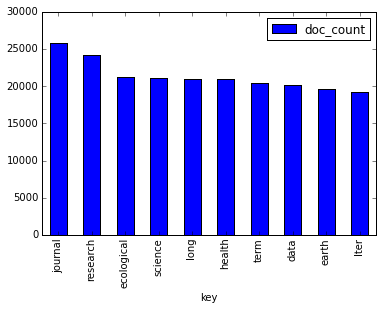

In [37]:
from matplotlib import pyplot
%matplotlib inline

top_tags_dataframe.plot(kind='bar', x='key', y='doc_count')
pyplot.show()

### Complex Queries and Dataframes

Let's make a new search, for all documents updated in the years 2012 to 2015 that contain the tag "science."

In [38]:
science_search = ShareSearch() #create search object
science_search = science_search.filter( #apply filter to search
    "range", #applied a range type filter
    providerUpdatedDateTime={ #the feild in the data we compare
        'gte':'2012-01-01', #hits must be greater than or equal to this date and...
        'lte':'2015-12-31' #hits must be less than or equal to this date
    }
)

In [39]:
science_search = science_search.filter(
     "prefix",
     tags="science"
)

science_search.aggs.bucket(
    'sources',
    'significant_terms',
    field='_type',
    min_doc_count=1,
    percentage={},
    size=0
)

SignificantTerms(field='_type', min_doc_count=1, percentage={}, size=0)

### Take a look at the query we've made

In [40]:
pretty_print(science_search.to_dict())

{
    "query": {
        "filtered": {
            "filter": {
                "bool": {
                    "must": [
                        {
                            "range": {
                                "providerUpdatedDateTime": {
                                    "gte": "2012-01-01", 
                                    "lte": "2015-12-31"
                                }
                            }
                        }, 
                        {
                            "prefix": {
                                "tags": "science"
                            }
                        }
                    ]
                }
            }, 
            "query": {
                "match_all": {}
            }
        }
    }, 
    "aggs": {
        "sources": {
            "significant_terms": {
                "field": "_type", 
                "percentage": {}, 
                "min_doc_count": 1, 
                "size": 0
            }
        }
    }
}

### Make the query, and graph the result

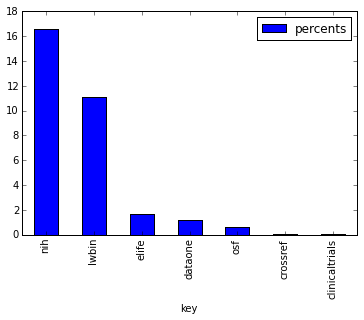

In [41]:
import pandas as pd
from matplotlib import pyplot

%matplotlib inline

science_search_results = science_search.execute()

science_results = science_search_results.aggregations.sources.to_dict()  
science_data_frame = pd.DataFrame(science_results['buckets']) 

science_data_frame['percents'] = (science_data_frame['score'] * 100)

science_data_frame[:30].plot(kind='bar', x='key', y='percents') # Limit to the first 30 results for readability

pyplot.show()

### Plot Number of Documents by Source

We'll limit it to the top 30 sources to make sure that the graph is readable.

In [42]:
from sharepa import bucket_to_dataframe

all_results = ShareSearch()

all_results = all_results.query(
    'query_string',
    query='*',
    analyze_wildcard=True
)

all_results.aggs.bucket(
    'sources',
    'terms',
    field='_type',
    size=0,
    min_doc_count=0
)

Terms(field='_type', min_doc_count=0, size=0)

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


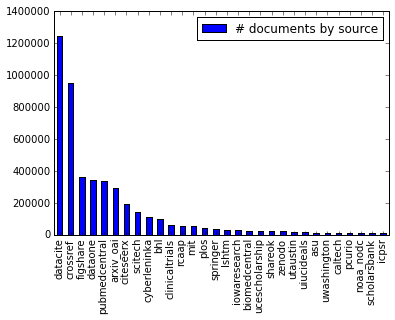

In [43]:
all_results = all_results.execute()

all_results_frame = bucket_to_dataframe(
    '# documents by source',
    all_results.aggregations.sources.buckets
)

all_results_frame_sorted = all_results_frame.sort(
    ascending=False,
    columns='# documents by source'
)

all_results_frame_sorted[:30].plot(kind='bar')

### Different Kinds of Charts

Let's make a pie chart

- Limited to 10 sources

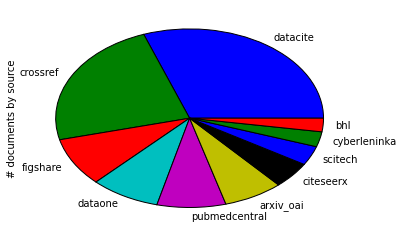

In [44]:
all_results_frame_sorted[:10].plot(kind='pie', y="# documents by source", legend=False)

## SHARE Data in the Wide World

Here are some examples of how to get SHARE data into different formats

### Exporting a DataFrame to csv and Excel

Let's do a query and then export the results to different formats.

We're interested in the number of documents from each source that have a description.

In [45]:
description_search = ShareSearch()

description_search = description_search.query(
    'query_string', 
    query='description:*',
    analyze_wildcard=True
)

description_search.aggs.bucket(
    'sources',
    'significant_terms',
    field='_type',
    min_doc_count=0,
    percentage={},
    size=0
)

description_results = description_search.execute()

### Cleaning up our dataframe

In [46]:
description_dataframe = pd.DataFrame(description_results.aggregations.sources.to_dict()['buckets'])

# We will add our own "percent" column to make things clearer
description_dataframe['percent'] = (description_dataframe['score'] * 100)
# And, drop the old score column
description_dataframe = description_dataframe.drop('score', 1)

# Let's set the source name as the index, and then drop the old column
description_dataframe = description_dataframe.set_index(description_dataframe['key'])
description_dataframe = description_dataframe.drop('key', 1)

In [47]:
# Finally, we'll show the results!
description_dataframe

,bg_count,doc_count,percent
key,,,
ut_chattanooga,271,271,100.000000
mason,20,20,100.000000
nist,3,3,100.000000
pcurio,12010,11981,99.758535
columbia,1764,1745,98.922902
addis_ababa,1916,1878,98.016701
dailyssrn,7053,6871,97.419538
oaktrust,1563,1501,96.033269
harvarddataverse,1807,1731,95.794134


### Exporting to CSV and Excel formats

Pandas has handy tools built in that makes converting a dataframe very easy

In [57]:
description_dataframe.to_csv('exported_data/SHARE_Counts_with_Descriptions.csv')
description_dataframe.to_excel('exported_data/SHARE_Counts_with_Descriptions.xlsx')

### Working with Outside Data

Here's a quick example of how you could work with a list of names, and use them to see what information is in SHARE

In [49]:
names = ["Susan Jones", "Ravi Patel"]

In [50]:
name_search = ShareSearch()

for name in names:
    name_search = name_search.query(
        {
            "bool": {
                "should": [
                    {
                        "match": {
                            "contributors.name": {
                                "query": name, 
                                "operator": "and",
                                "type" : "phrase"
                            }
                        }
                    }
                ]
            }
        }
    )


name_results = name_search.execute()

In [51]:
print(
    'There are {} documents with contributors who have any of those names.'.format(
        name_search.count()
    )
)

print('Here are the first 10:')
print('---------')
for result in name_results:
    print(
        '{} -- with contributors {}'.format(
            result.title.encode('utf-8'),
            ', '.join([contributor.name.encode('utf-8') for contributor in result.contributors])
        )
    )

There are 33 documents with contributors who have any of those names.
Here are the first 10:
---------
Short- and Long-Term Outcomes for Extremely Preterm Infants -- with contributors Ravi Patel
"Prospective, Randomized, Multi-Center, Efficacy Non-inferiority Study of MEDIHONEY® Gel Versus Collagenase for Wound Debridement" -- with contributors Ravi Patel, MD
Obstetrical and Neonatal Perspectives on Prematurity -- with contributors Tracy Manuck, Ravi Patel
Representative structures of bHLH proteins from the Protein Data Bank -- with contributors Susan Jones
The cohesion interaction network -- with contributors Susan Jones, John Sgouros
‘It’s not what it looks like. I’m Santa’: Connecting Community through Film -- with contributors Susan Jones, Joanna McIntyre
Evolutionary tree for SMC proteins, created using PHYLIP 69,70 -- with contributors Susan Jones, John Sgouros
Structure of an SMC protein -- with contributors Susan Jones, John Sgouros
Sequence alignments for three motifs shared b

### Where did these results come from?

We can add an aggregation!

In [52]:
name_search.aggs.bucket(
    'sources',  # Every aggregation needs a name
    'terms',  # There are many kinds of aggregations, terms is a pretty useful one though
    field='_type',  # We store the source of a document in its type, so this will aggregate by source
    size=0,  # These are just to make sure we get numbers for all the sources, to make it easier to combine graphs
    min_doc_count=1
)

name_results = name_search.execute()

pd.DataFrame(name_results.aggregations.sources.to_dict()['buckets'])

,doc_count,key
0,11,crossref
1,11,datacite
2,6,pubmedcentral
3,3,clinicaltrials
4,1,arxiv_oai
5,1,citeseerx


### Searching by ORCID 

In [53]:
orcids = [
    'http://orcid.org/0000-0003-1942-4543',
    'http://orcid.org/0000-0003-4875-1447',
    'http://orcid.org/0000-0002-6085-4433',
    'http://orcid.org/0000-0002-7995-9948',
    'http://orcid.org/0000-0002-2170-853X',
    'http://orcid.org/0000-0002-8899-9087'
]

In [54]:
orcid_search = ShareSearch()

for orcid in orcids:
    orcid_search = orcid_search.query(
        {
            "bool": {
                "should": [
                    {
                        "match": {
                            "contributors.sameAs": {
                                "query": orcid, 
                                "operator": "and",
                                "type" : "phrase"
                            }
                        }
                    }
                ]
            }
        }
    )

In [55]:
orcid_search.aggs.bucket(
    'sources',
    'terms',
    field='_type',
    size=0,
    min_doc_count=1
)

orcid_results = orcid_search.execute()

In [56]:
print(
    'There are {} documents with contributors who have any of those orcids.'.format(
        orcid_search.count()
    )
)

all_agg_df = pd.DataFrame()
all_agg_df['title'] = [result.title for result in orcid_results]
all_agg_df['docID'] = [result.shareProperties.docID for result in orcid_results]
all_agg_df['source'] = [result.shareProperties.source for result in orcid_results]
all_agg_df

There are 8 documents with contributors who have any of those orcids.


,title,docID,source
0,Widespread shortening of 3' untranslated regio...,10.1101/026831,crossref
1,COMADRE: a global database of animal demography,10.1101/027821,crossref
2,A psychometric analysis of outcome measures in...,10.1136/annrheumdis-2014-207235,crossref
3,A selfish genetic element drives recurring sel...,10.1101/024851,crossref
4,Optimisation of a treat-to-target approach in ...,10.1136/annrheumdis-2015-208324,crossref
5,Light-induced indeterminacy alters shade avoid...,10.1101/024018,crossref
6,Pharmacological treatment of psoriatic arthrit...,10.1136/annrheumdis-2015-208466,crossref
7,"In wealthier countries, patients perceive wors...",10.1136/annrheumdis-2015-207738,crossref


## This is just the surface!

The SHARE API has the potential to answer many questions about our data

Data curation and enhancement will only make these analasyes more interesting.

# Thank you!

## Questions?

**email**: erin@cos.io

*SHARE Technical Documentation and Information*: https://osf.io/t3j94/

*these slides and example notebooks*:  https://osf.io/bygau/